## Final Assignment - Sanket Sanap
### Bank Loan Status Classification

In [ ]:
#Installing dependencies
!pip install eli5
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install shap
!pip install lime
!pip install treeinterpreter
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

     |████████████████████████████████| 106 kB 5.1 MB/s 
     |████████████████████████████████| 564 kB 4.9 MB/s 
     |████████████████████████████████| 275 kB 5.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=00b64b5c35b32eb6baf19e9a74ef9a3f652a935758f4b6a79b50ee09d23a58e1
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.0 MB 22 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=a29fd5fd5829eee6ab075a8b039ce402dd32ee70201b23fdf549495f5e698515
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [ ]:
#Reference [1]
# Import libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
from scipy.stats import linregress
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import random, os, sys
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn_pandas import DataFrameMapper
from sklearn.linear_model import LogisticRegression

In [ ]:
#Reference [1]
# Set a minimum memory size and a run time in seconds
min_mem_size=6
#Increased Run time compared to refernece code
run_time=360

In [ ]:
#Reference [1]
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
#Reference [1]
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:44500 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc0s4by50
  JVM stdout: /tmp/tmpc0s4by50/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc0s4by50/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:44500
Connecting to H2O server at http://127.0.0.1:44500 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    22 days
H2O_cluster_name:           H2O_from_python_unknownUser_1xmv9o
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:44500
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

## Abstract

Many times it may happen that when we apply for a Bank Loan and Bank would verify and conduct background check on us. This process can be automated with the help of Machine Learning and accurately prdeict the evaluation scheme if particular loan will be 'Fully Paid' or 'Charged Off'. Which means if Bank accepts particular person's loan application will it be Fully Paid or it won't.

This could be very important for banking system to predict the results based upon customer's data and his/her finiancial details which could be a major factor for deciding whether or not loan application should be accepted or not for particular customer to automate Bank Loan Application Process

In this notebook we are going to perform Exploratory Data Analysis (EDA), clean data and select feature using various machine learning and statistical techniques on Bank Loan Status dataset

We will be looking at distribution of data and handle null values using multiple imputation techniques and recover data with it and then test its effect in out predictive model

We will be using feature selection techniques to identify important features in dataset

In this notebook we are going to interprete models using various machine learning techniques on Bank Loan Status dataset

We will be looking at contribution of each feature in the model using Shap value and visulaize it in the predictive model. We will be using Linear, Tree based models and its inbuilt interpretability along with it Partial Dependence Plot, Shap

### Import Bank Loan Status Dataset

Importing csv dataset from GitHub

In [ ]:
#Reference [1]
url = "https://raw.githubusercontent.com/sanketsanap5/Bank-Loan-Status-Predictive-Analysis/main/KaggleDataset/BankLoanStatusDataset/credit_train.csv"
og_df = h2o.import_file(path = url)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Reading data in pd dataframe
og_pdf = pd.read_csv("https://raw.githubusercontent.com/sanketsanap5/Bank-Loan-Status-Predictive-Analysis/main/KaggleDataset/BankLoanStatusDataset/credit_train.csv")


In [ ]:
#Getting rid of blank space in columns and Null/Missing Values
og_df=og_df.na_omit()
og_pdf = og_pdf.dropna()
og_pdf.rename(columns = {'Loan Status':'Loan_Status'}, inplace = True)
og_pdf.rename(columns = {'Current Loan Amount':'Current_Loan_Amount'}, inplace = True)
og_pdf.rename(columns = {'Credit Score':'Credit_Score'}, inplace = True)
og_pdf.rename(columns = {'Annual Income':'Annual_Income'}, inplace = True)
og_pdf.rename(columns = {'Years in current job':'Years_in_currentjob'}, inplace = True)
og_pdf.rename(columns = {'Home Ownership':'Home_Ownership'}, inplace = True)
og_pdf.rename(columns = {'Monthly Debt':'Monthly_Debt'}, inplace = True)
og_pdf.rename(columns = {'Years of Credit History':'Years_of_Credit_History'}, inplace = True)
og_pdf.rename(columns = {'Months since last delinquent':'Months_since_last_delinquent'}, inplace = True)
og_pdf.rename(columns = {'Number of Open Accounts':'Number_of_Open_Accounts'}, inplace = True)
og_pdf.rename(columns = {'Current Credit Balance':'Current_Credit_Balance'}, inplace = True)
og_pdf.rename(columns = {'Maximum Open Credit':'Maximum_Open_Credit'}, inplace = True)
df = og_df
pdf = og_pdf
df.head(1)


Loan ID Customer ID Loan Status Current Loan Amount Term Credit Score Annual Income Years in current job Home Ownership Purpose Monthly Debt Years of Credit History Months since last delinquent Number of Open Accounts Number of Credit Problems Current Credit Balance Maximum Open Credit Bankruptcies Tax Liens 
 
 
 4EED4E6A-AA2F-4C91-8651-CE984EE8FB26 5EFB2B2B-BF11-4DFD-A572-3761A2694725 Fully Paid 1e+08 Short Term 741 2.23189e+06 8 years Own Home Debt Consolidation 29200.5 14.9 29 18 1 297996 750090 0 0

### Dropping Constant Columns Loan ID & Customer ID

In [ ]:
#Removing ID columns
pdf.drop(columns=['Loan ID', 'Customer ID'],inplace=True)
df=df.drop('Loan ID')
df=df.drop('Customer ID')
print("Done")

Done


## Data Types

From the sample data we can see that we have mix data types which includes 

**Numeric Fields** : `Current Loan Amount`, `Credit Score`, `Annual Income`, `Monthly Debt`, `Years of Credit History`, `Months since last delinquent`, `Number of Open Accounts`, `Number of Credit Problems`, `Maximum Open Credit`, `Bankruptcies`

**Categorical Fields** : `Term`, `Years in current job`, `Home Ownership`, `Purpose`

In [ ]:
pdf.dtypes

Loan_Status                      object
Current_Loan_Amount             float64
Term                             object
Credit_Score                    float64
Annual_Income                   float64
Years_in_currentjob              object
Home_Ownership                   object
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts         float64
Number of Credit Problems       float64
Current_Credit_Balance          float64
Maximum_Open_Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [ ]:
print("Home Ownership:\n ", pdf['Home_Ownership'].unique())
print("\nTerm: \n", pdf['Term'].unique())
print("\nYears in current job: \n", pdf['Years_in_currentjob'].unique())
print("\nLoan Status: \n", pdf['Loan_Status'].unique())
print("\nPurpose: \n", pdf['Purpose'].unique())

Home Ownership:
  ['Own Home' 'Home Mortgage' 'Rent' 'HaveMortgage']

Term: 
 ['Short Term' 'Long Term']

Years in current job: 
 ['8 years' '< 1 year' '2 years' '3 years' '10+ years' '4 years' '6 years'
 '7 years' '5 years' '1 year' '9 years']

Loan Status: 
 ['Fully Paid' 'Charged Off']

Purpose: 
 ['Debt Consolidation' 'Buy House' 'other' 'Take a Trip'
 'Home Improvements' 'Other' 'Buy a Car' 'Medical Bills' 'wedding'
 'Business Loan' 'small_business' 'major_purchase' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


Lets encode these categorical features

In [ ]:
pdf.Term = pdf.Term.astype('category').cat.codes
pdf.Home_Ownership=pdf.Home_Ownership.astype('category').cat.codes
pdf.Years_in_currentjob = pdf.Years_in_currentjob.astype('category').cat.codes
pdf.Loan_Status = pdf.Loan_Status.astype('category').cat.codes
pdf.Purpose = pdf.Purpose.astype('category').cat.codes

print("Home Ownership:\n ", pdf['Home_Ownership'].unique())
print("\nTerm: \n", pdf['Term'].unique())
print("\nYears in current job: \n", pdf['Years_in_currentjob'].unique())
print("\nLoan Status: \n", pdf['Loan_Status'].unique())
print("\nPurpose: \n", pdf['Purpose'].unique())

Home Ownership:
  [2 1 3 0]

Term: 
 [1 0]

Years in current job: 
 [ 8 10  2  3  1  4  6  7  5  0  9]

Loan Status: 
 [1 0]

Purpose: 
 [ 3  1 11  8  5  7  2  6 15  0 13  9 14  4 10 12]


In [ ]:
pdf.describe()

Loan_Status  Current_Loan_Amount          Term  Credit_Score  \
count  36423.000000         3.642300e+04  36423.000000  36423.000000   
mean       0.795431         1.377581e+07      0.709854   1055.688905   
std        0.403392         3.406789e+07      0.453836   1438.252560   
min        0.000000         2.145000e+04      0.000000    585.000000   
25%        1.000000         1.907840e+05      0.000000    702.000000   
50%        1.000000         3.247200e+05      1.000000    721.000000   
75%        1.000000         5.421900e+05      1.000000    738.000000   
max        1.000000         1.000000e+08      1.000000   7510.000000   

       Annual_Income  Years_in_currentjob  Home_Ownership       Purpose  \
count   3.642300e+04         36423.000000    36423.000000  36423.000000   
mean    1.464561e+06             3.596354        1.870823      3.845235   
std     9.357681e+05             3.120041        0.950005      2.315432   
min     1.112450e+05             0.000000        0.000000      0.000000   
25%     9.309050e+05             1.000000        1.000000      3.000000   
50%     1.260498e+06             2.000000        1.000000      3.000000   
75%     1.742766e+06             6.000000        3.000000      3.000000   
max     3.083900e+07            10.000000        3.000000     15.000000   

        Monthly_Debt  Years_of_Credit_History  Months_since_last_delinquent  \
count   36423.000000             36423.000000                  36423.000000   
mean    19269.251544                19.065000                     34.851358   
std     12100.926465                 6.654911                     21.916600   
min         0.000000                 3.800000                      0.000000   
25%     11125.735000                14.500000                     16.000000   
50%     17117.480000                17.700000                     31.000000   
75%     24766.120000                22.400000                     51.000000   
max    229057.920000                70.500000                    176.000000   

       Number_of_Open_Accounts  Number of Credit Problems  \
count             36423.000000               36423.000000   
mean                 11.490816                   0.186036   
std                   4.991626                   0.528248   
min                   1.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  11.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  48.000000                  15.000000   

       Current_Credit_Balance  Maximum_Open_Credit  Bankruptcies     Tax Liens  
count            3.642300e+04         3.642300e+04  36423.000000  36423.000000  
mean             2.636261e+05         6.651413e+05      0.114790      0.038575  
std              3.176197e+05         5.703167e+06      0.359648      0.298938  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.010515e+05         2.472910e+05      0.000000      0.000000  
50%              1.869600e+05         4.214760e+05      0.000000      0.000000  
75%              3.284340e+05         7.029660e+05      0.000000      0.000000  
max              7.350321e+06         7.982554e+08      7.000000     15.000000

## Missing Values

We can see that we have no null values in our dataset, we can make some % of null values for imputation later in this notebook

Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_currentjob             0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number of Credit Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

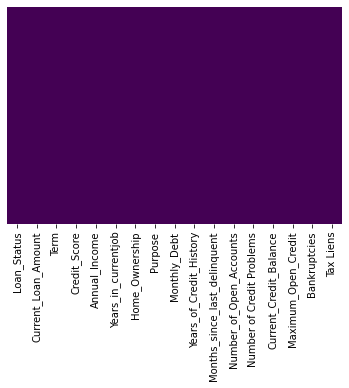

In [ ]:
sns.heatmap(pdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
pdf.isnull().sum()

## Distributions of the Numeric variables

From below histplots we can see that most of the features are distributed. 

However, in some featrues due to outliers we can see the tail of the graphs at side

count    36423.000000
mean         3.596354
std          3.120041
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         10.000000
Name: Years_in_currentjob, dtype: float64


Text(0.5, 1.0, 'Years_in_currentjob Count')

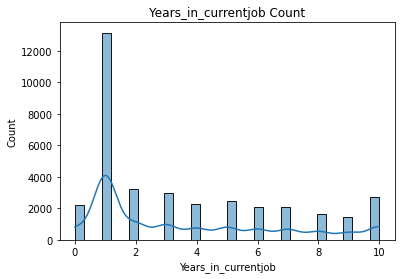

In [ ]:
print(pdf['Years_in_currentjob'].describe())
ax=sns.histplot(pdf.Years_in_currentjob,kde=True)
ax.set_title('Years_in_currentjob Count')

count       36423
mean      1464560
std        935768
min        111245
25%        930905
50%       1260498
75%       1742765
max      30838995
Name: Annual_Income, dtype: int64


Text(0.5, 1.0, 'Annual_Income Count')

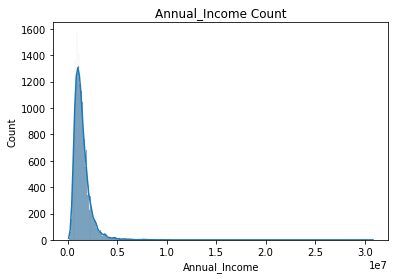

In [ ]:
print(pdf['Annual_Income'].describe().astype('int'))
ax=sns.histplot(pdf.Annual_Income,kde=True)
ax.set_title('Annual_Income Count')

count    36423.000000
mean        19.065000
std          6.654911
min          3.800000
25%         14.500000
50%         17.700000
75%         22.400000
max         70.500000
Name: Years_of_Credit_History, dtype: float64


Text(0.5, 1.0, 'Years_of_Credit_History Count')

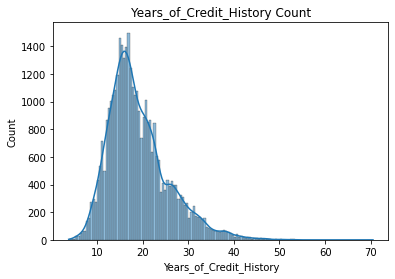

In [ ]:
print(pdf['Years_of_Credit_History'].describe())
ax=sns.histplot(pdf.Years_of_Credit_History,kde=True)
ax.set_title('Years_of_Credit_History Count')

count       36423
mean     13775805
std      34067890
min         21450
25%        190784
50%        324720
75%        542190
max      99999999
Name: Current_Loan_Amount, dtype: int64


Text(0.5, 1.0, 'Current_Loan_Amount Count')

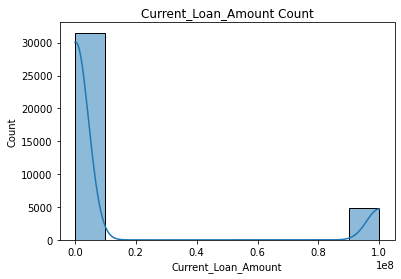

In [ ]:
print(pdf['Current_Loan_Amount'].describe().astype('int'))
ax=sns.histplot(pdf.Current_Loan_Amount,kde=True,bins=10)
ax.set_title('Current_Loan_Amount Count')

count     36423.000000
mean      19269.251544
std       12100.926465
min           0.000000
25%       11125.735000
50%       17117.480000
75%       24766.120000
max      229057.920000
Name: Monthly_Debt, dtype: float64


Text(0.5, 1.0, 'Monthly_Debt Count')

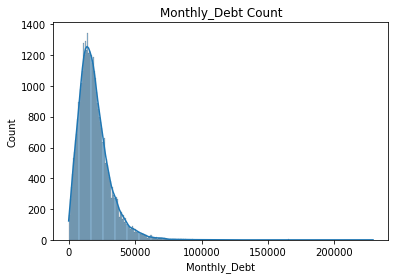

In [ ]:
print(pdf['Monthly_Debt'].describe())
ax=sns.histplot(pdf.Monthly_Debt,kde=True)
ax.set_title('Monthly_Debt Count')

count    36423.000000
mean        11.490816
std          4.991626
min          1.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         48.000000
Name: Number_of_Open_Accounts, dtype: float64


Text(0.5, 1.0, 'Number_of_Open_Accounts  Count')

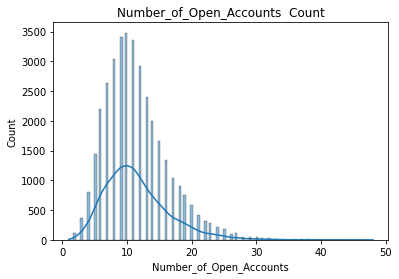

In [ ]:
print(pdf['Number_of_Open_Accounts'].describe())
ax=sns.histplot(pdf.Number_of_Open_Accounts,kde=True)
ax.set_title('Number_of_Open_Accounts  Count')

count      36423
mean      263626
std       317619
min            0
25%       101051
50%       186960
75%       328434
max      7350321
Name: Current_Credit_Balance, dtype: int64


Text(0.5, 1.0, 'Current_Credit_Balance Count')

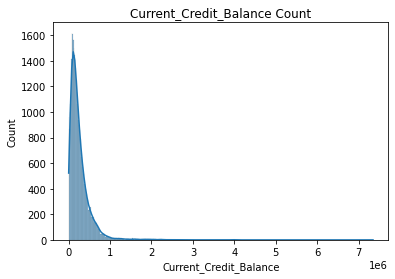

In [ ]:
print(pdf['Current_Credit_Balance'].describe().astype('int'))
ax=sns.histplot(pdf.Current_Credit_Balance,kde=True)
ax.set_title('Current_Credit_Balance Count')

count    36423.000000
mean      1055.688905
std       1438.252560
min        585.000000
25%        702.000000
50%        721.000000
75%        738.000000
max       7510.000000
Name: Credit_Score, dtype: float64


Text(0.5, 1.0, 'Credit_Score Count')

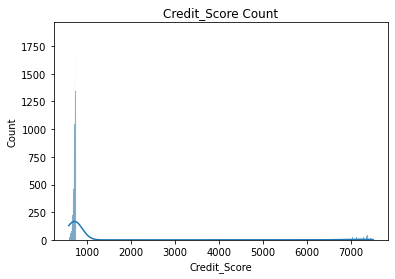

In [ ]:
print(pdf['Credit_Score'].describe())
#sns.distplot(pdf.Credit_Score,color='g',bins=np.arange(500,8000,100))
ax=sns.histplot(pdf.Credit_Score,kde=True)
ax.set_title('Credit_Score Count')

## Variable Importance

We will use RandomForestClassifier, KNeighborsClassifier and DecisionTreeClassifier to get the feature importance for the dataset.

We will train these model individually and plot variable importance graph

From these plot we can see that `Credit Score`, `Current Loan Amount`, `Annual Income`, `Years of Credit History` are the most important features listed by all 3 techniques

In [ ]:
# logistic regression for feature importance
# define dataset
run_time=100
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])
target='Loan Status'
#df_train.drop(target)

In [ ]:
df_train[target]=df_train[target].asfactor()
df_test[target]=df_test[target].asfactor()

Let's Train Random Forest Estimator from H20 library

In [ ]:
drf = H2ORandomForestEstimator(ntrees=70,max_depth=25,validation_frame=df_test,nfolds=5)
drf.train(x=df_train.columns,y=target,training_frame=df_train,validation_frame=df_test,max_runtime_secs=run_time)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1651784690948_1451


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               36.0                      36.0            1416288.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       25.0       25.0        25.0      2901.0      3411.0     3119.611



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11991692368572039
RMSE: 0.3462902304219979
LogLoss: 0.48005407809173
Mean Per-Class Error: 0.36788367666381333
AUC: 0.796764858372476
AUCPR: 0.9294052729266858
Gini: 0.593529716744952

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25026508834626937: 


Charged Off  Fully Paid   Error               Rate
0  Charged Off       1680.0      4666.0  0.7353    (4666.0/6346.0)
1   Fully Paid         12.0     23938.0  0.0005     (12.0/23950.0)
2        Total       1692.0     28604.0  0.1544   (4678.0/30296.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.250265      0.910987  375.0
1                        max f2   0.166667      0.962220  382.0
2                  max f0point5   0.681771      0.871648  241.0
3                  max accuracy   0.271988      0.845590  372.0
4                 max precision   1.000000      0.982016    0.0
5                    max recall   0.000000      1.000000  399.0
6               max specificity   1.000000      0.985188    0.0
7              max absolute_mcc   0.250265      0.468248  375.0
8    max min_per_class_accuracy   0.804241      0.708163  157.0
9   max mean_per_class_accuracy   0.791768      0.709842  166.0
10                      max tns   1.000000   6252.000000    0.0
11                      max fns   1.000000  18817.000000    0.0
12                      max fps   0.000000   6346.000000  399.0
13                      max tps   0.000000  23950.000000  399.0
14                      max tnr   1.000000      0.985188    0.0
15                      max fnr   1.000000      0.785678    0.0
16                      max fpr   0.000000      1.000000  399.0
17                      max tpr   0.000000      1.000000  399.0


Gains/Lift Table: Avg response rate: 79.05 %, avg score: 79.63 %


group  cumulative_data_fraction  lower_threshold      lift  \
0      1                  0.172465         1.000000  1.242211   
1      2                  0.200026         0.987941  1.178618   
2      3                  0.300007         0.932715  1.154300   
3      4                  0.405895         0.900000  1.120649   
4      5                  0.500000         0.857709  1.084386   
5      6                  0.600013         0.816674  1.044538   
6      7                  0.699993         0.763636  0.978064   
7      8                  0.801723         0.692308  0.944006   
8      9                  0.900251         0.555556  0.871282   
9     10                  1.000000         0.000000  0.331102   

   cumulative_lift  response_rate     score  cumulative_response_rate  \
0         1.242211       0.982010  1.000000                  0.982010   
1         1.233449       0.931737  0.993176                  0.975083   
2         1.207072       0.912512  0.960907                  0.954230   
3         1.184526       0.885910  0.915504                  0.936407   
4         1.165678       0.857243  0.879468                  0.921508   
5         1.145486       0.825743  0.837687                  0.905545   
6         1.121573       0.773192  0.790139                  0.886641   
7         1.099042       0.746269  0.728738                  0.868830   
8         1.074115       0.688777  0.631762                  0.849124   
9         1.000000       0.261747  0.215862                  0.790533   

   cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0          1.000000      0.214238                 0.214238  24.221135   
1          0.999060      0.032484                 0.246722  17.861753   
2          0.986345      0.115407                 0.362129  15.429959   
3          0.967864      0.118664                 0.480793  12.064869   
4          0.951227      0.102046                 0.582839   8.438564   
5          0.932302      0.104468                 0.687307   4.453850   
6          0.911997      0.097787                 0.785094  -2.193573   
7          0.888743      0.096033                 0.881127  -5.599352   
8          0.860618      0.085846                 0.966973 -12.871839   
9          0.796304      0.033027                 1.000000 -66.889800   

   cumulative_gain  kolmogorov_smirnov  
0        24.221135            0.199426  
1        23.344884            0.222928  
2        20.707156            0.296576  
3        18.452585            0.357566  
4        16.567850            0.395477  
5        14.548628            0.416743  
6        12.157336            0.406273  
7         9.904212            0.379079  
8         7.411490            0.318533  
9         0.000000            0.000000



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.11086202566145474
RMSE: 0.3329594955267904
LogLoss: 0.3518174740616901
Mean Per-Class Error: 0.36820431628861505
AUC: 0.8233894181209839
AUCPR: 0.9462233290983639
Gini: 0.6467788362419677

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3838348765340116: 


Charged Off  Fully Paid   Error              Rate
0  Charged Off        408.0      1137.0  0.7359   (1137.0/1545.0)
1   Fully Paid          3.0      6166.0  0.0005      (3.0/6169.0)
2        Total        411.0      7303.0  0.1478   (1140.0/7714.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.383835     0.915380  389.0
1                        max f2   0.333333     0.964328  393.0
2                  max f0point5   0.726516     0.882382  250.0
3                  max accuracy   0.525420     0.852606  359.0
4                 max precision   1.000000     1.000000    0.0
5                    max recall   0.333333     1.000000  393.0
6               max specificity   1.000000     1.000000    0.0
7              max absolute_mcc   0.333333     0.469759  393.0
8    max min_per_class_accuracy   0.804596     0.727995  187.0
9   max mean_per_class_accuracy   0.821665     0.732250  171.0
10                      max tns   1.000000  1545.000000    0.0
11                      max fns   1.000000  5233.000000    0.0
12                      max fps   0.000000  1545.000000  399.0
13                      max tps   0.333333  6169.000000  393.0
14                      max tnr   1.000000     1.000000    0.0
15                      max fnr   1.000000     0.848274    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.333333     1.000000  393.0


Gains/Lift Table: Avg response rate: 79.97 %, avg score: 80.08 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.121208         1.000000  1.250446   
1       2                  0.161006         0.972222  1.234153   
2       3                  0.200026         0.954268  1.175668   
3       4                  0.299974         0.919464  1.182328   
4       5                  0.402256         0.888889  1.144261   
5       6                  0.500000         0.855976  1.096213   
6       7                  0.599948         0.820351  1.041227   
7       8                  0.700026         0.774299  0.965370   
8       9                  0.799974         0.715476  0.926076   
9      10                  0.902774         0.611111  0.856232   
10     11                  1.000000         0.000000  0.306776   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.250446       1.000000  1.000000                  1.000000   
1          1.246419       0.986971  0.980137                  0.996779   
2          1.232617       0.940199  0.963448                  0.985742   
3          1.215861       0.945525  0.937251                  0.972342   
4          1.197655       0.915082  0.904950                  0.957783   
5          1.177825       0.876658  0.872371                  0.941924   
6          1.155068       0.832685  0.838246                  0.923725   
7          1.127948       0.772021  0.797297                  0.902037   
8          1.102727       0.740597  0.745581                  0.881867   
9          1.074658       0.684741  0.669245                  0.859420   
10         1.000000       0.245333  0.253402                  0.799715   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.151564                 0.151564  25.044578   
1           0.995090      0.049117                 0.200681  23.415332   
2           0.988918      0.045875                 0.246555  17.566829   
3           0.971703      0.118172                 0.364727  18.232811   
4           0.954730      0.117037                 0.481764  14.426090   
5           0.938629      0.107149                 0.588912   9.621308   
6           0.921906      0.104069                 0.692981   4.122722   
7           0.904092      0.096612                 0.789593  -3.462994   
8           0.884287      0.092560                 0.882153  -7.392407   
9           0.859800      0.088021                 0.970173 -14.376790   
10          0.800843      0.029827                 1.000000 -69.322397   

    cumulative_gain  kolmogorov_smirnov  
0         25.044578            0.151564  
1         24.641858            0.198092  
2         23.261700            0.232316  
3         21.586128            0.323303  
4         19.765545            0.396974  
5         17.782461            0.443928  
6         15.506821            0.464502  
7         12.794840            0.447198  
8         10.272661            0.410308  
9          7.465795            0.336516  
10         0.000000            0.000000



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1162228841207944
RMSE: 0.34091477545098336
LogLoss: 0.36558828874405963
Mean Per-Class Error: 0.3688150015757958
AUC: 0.8145175466011171
AUCPR: 0.9410182965467845
Gini: 0.6290350932022342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24285714285714288: 


Charged Off  Fully Paid   Error               Rate
0  Charged Off       1665.0      4681.0  0.7376    (4681.0/6346.0)
1   Fully Paid          0.0     23950.0     0.0      (0.0/23950.0)
2        Total       1665.0     28631.0  0.1545   (4681.0/30296.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.242857      0.910975  389.0
1                        max f2   0.242857      0.962381  389.0
2                  max f0point5   0.722091      0.872176  250.0
3                  max accuracy   0.471182      0.845656  372.0
4                 max precision   0.999994      1.000000    0.0
5                    max recall   0.242857      1.000000  389.0
6               max specificity   0.999994      1.000000    0.0
7              max absolute_mcc   0.242857      0.468481  389.0
8    max min_per_class_accuracy   0.798910      0.719624  184.0
9   max mean_per_class_accuracy   0.819446      0.723693  165.0
10                      max tns   0.999994   6346.000000    0.0
11                      max fns   0.999994  20901.000000    0.0
12                      max fps   0.000000   6346.000000  399.0
13                      max tps   0.242857  23950.000000  389.0
14                      max tnr   0.999994      1.000000    0.0
15                      max fnr   0.999994      0.872693    0.0
16                      max fpr   0.000000      1.000000  399.0
17                      max tpr   0.242857      1.000000  389.0


Gains/Lift Table: Avg response rate: 79.05 %, avg score: 79.37 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.099881         1.000000  1.264969   
1       2                  0.100013         0.999520  1.264969   
2       3                  0.150020         0.967388  1.252444   
3       4                  0.200026         0.941060  1.219046   
4       5                  0.300007         0.906455  1.184368   
5       6                  0.400020         0.875404  1.133045   
6       7                  0.500000         0.843360  1.086645   
7       8                  0.600013         0.808378  1.026587   
8       9                  0.699993         0.767695  0.958019   
9      10                  0.800007         0.714885  0.913867   
10     11                  0.899987         0.626002  0.849855   
11     12                  1.000000         0.000000  0.346927   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.264969       1.000000  1.000000                  1.000000   
1          1.264969       1.000000  0.999720                  1.000000   
2          1.260794       0.990099  0.981289                  0.996700   
3          1.250357       0.963696  0.953239                  0.988449   
4          1.228365       0.936283  0.922802                  0.971064   
5          1.204533       0.895710  0.890921                  0.952224   
6          1.180960       0.859029  0.859840                  0.933589   
7          1.155229       0.811551  0.826772                  0.913247   
8          1.127061       0.757346  0.788392                  0.890979   
9          1.100408       0.722442  0.742762                  0.869910   
10         1.072574       0.671839  0.676839                  0.847906   
11         1.000000       0.274257  0.261169                  0.790533   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.126347                 0.126347  26.496868   
1           1.000000      0.000167                 0.126514  26.496868   
2           0.993763      0.062630                 0.189144  25.244424   
3           0.983632      0.060960                 0.250104  21.904573   
4           0.963360      0.118413                 0.368518  18.436817   
5           0.945248      0.113319                 0.481837  13.304456   
6           0.928170      0.108643                 0.590480   8.664527   
7           0.911269      0.102672                 0.693152   2.658680   
8           0.893718      0.095783                 0.788935  -4.198146   
9           0.874846      0.091399                 0.880334  -8.613318   
10          0.852849      0.084969                 0.965303 -15.014484   
11          0.793674      0.034697                 1.000000 -65.307294   

    cumulative_gain  kolmogorov_smirnov  
0         26.496868            0.126347  
1         26.496868            0.126514  
2         26.079387            0.186780  
3         25.035684            0.239074  
4         22.836545            0.327074  
5         20.453326            0.390599  
6         18.096033            0.431955  
7         15.522858            0.444649  
8         12.706103            0.424611  
9         10.040846            0.383486  
10         7.257431            0.311820  
11         0.000000            0.000000



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.846182   0.004517    0.846714    0.851085   
1                       auc    0.814634   0.003302    0.809597    0.815815   
2                       err    0.153818   0.004517    0.153286    0.148915   
3                 err_count  931.800000  21.440617  947.000000  899.000000   
4                  f0point5    0.866105   0.003606    0.867758    0.869336   
5                        f1    0.911134   0.002824    0.911305    0.914127   
6                        f2    0.961105   0.002194    0.959453    0.963785   
7            lift_top_group    1.265046   0.005697    1.262878    1.261651   
8                   logloss    0.365618   0.005654    0.367847    0.359314   
9       max_per_class_error    0.725024   0.007931    0.715397    0.718051   
10                      mcc    0.468986   0.012296    0.464249    0.487191   
11  mean_per_class_accuracy    0.636279   0.003970    0.639542    0.640974   
12     mean_per_class_error    0.363721   0.003970    0.360458    0.359026   
13                      mse    0.116238   0.002378    0.116745    0.113745   
14                   pr_auc    0.941048   0.001542    0.939585    0.941830   
15                precision    0.838480   0.004095    0.840968    0.841837   
16                       r2    0.298127   0.007128    0.291719    0.308028   
17                   recall    0.997582   0.002182    0.994481    1.000000   
18                     rmse    0.340923   0.003487    0.341679    0.337261   
19              specificity    0.274975   0.007931    0.284603    0.281949   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.840034    0.843438    0.849641  
1     0.813106    0.817269    0.817386  
2     0.159966    0.156562    0.150359  
3   951.000000  940.000000  922.000000  
4     0.861048    0.863615    0.868766  
5     0.907319    0.909441    0.913476  
6     0.958845    0.960404    0.963038  
7     1.272747    1.269076    1.258879  
8     0.372985    0.367399    0.360547  
9     0.733909    0.729772    0.727994  
10    0.454855    0.464267    0.474369  
11    0.631333    0.633951    0.635593  
12    0.368667    0.366049    0.364407  
13    0.119270    0.117507    0.113925  
14    0.939197    0.942059    0.942569  
15    0.832737    0.835546    0.841314  
16    0.291638    0.296660    0.302588  
17    0.996575    0.997675    0.999179  
18    0.345355    0.342793    0.337527  
19    0.266091    0.270228    0.272006


Scoring History: 


timestamp           duration  number_of_trees  training_rmse  \
0     2022-05-05 22:24:44   1 min  2.657 sec              0.0            NaN   
1     2022-05-05 22:24:44   1 min  2.810 sec              1.0       0.455705   
2     2022-05-05 22:24:44   1 min  2.971 sec              2.0       0.451410   
3     2022-05-05 22:24:44   1 min  3.127 sec              3.0       0.439594   
4     2022-05-05 22:24:44   1 min  3.305 sec              4.0       0.426343   
5     2022-05-05 22:24:45   1 min  3.493 sec              5.0       0.416340   
6     2022-05-05 22:24:45   1 min  3.714 sec              6.0       0.406508   
7     2022-05-05 22:24:45   1 min  3.934 sec              7.0       0.399819   
8     2022-05-05 22:24:45   1 min  4.146 sec              8.0       0.392067   
9     2022-05-05 22:24:45   1 min  4.382 sec              9.0       0.385397   
10    2022-05-05 22:24:46   1 min  4.698 sec             10.0       0.380293   
11    2022-05-05 22:24:46   1 min  4.944 sec             11.0       0.375643   
12    2022-05-05 22:24:46   1 min  5.220 sec             12.0       0.372276   
13    2022-05-05 22:24:47   1 min  5.492 sec             13.0       0.368663   
14    2022-05-05 22:24:47   1 min  5.774 sec             14.0       0.366328   
15    2022-05-05 22:24:47   1 min  6.045 sec             15.0       0.364109   
16    2022-05-05 22:24:47   1 min  6.345 sec             16.0       0.362043   
17    2022-05-05 22:24:48   1 min  6.640 sec             17.0       0.360271   
18    2022-05-05 22:24:50   1 min  9.342 sec             36.0       0.346290   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0                NaN           NaN              NaN            NaN   
1           6.525059      0.663556         0.853096       1.085043   
2           6.146707      0.667621         0.854852       1.087308   
3           5.383614      0.677495         0.860220       1.094550   
4           4.597052      0.692665         0.865763       1.102862   
5           4.027589      0.699251         0.868557       1.106737   
6           3.480061      0.709601         0.873473       1.114473   
7           3.068354      0.716504         0.876998       1.120332   
8           2.681301      0.724166         0.880887       1.126691   
9           2.336561      0.733311         0.886023       1.135845   
10          2.085762      0.739006         0.888877       1.141232   
11          1.872797      0.745413         0.892338       1.147595   
12          1.712976      0.749529         0.894643       1.152012   
13          1.531895      0.753649         0.897133       1.157338   
14          1.383280      0.757412         0.900128       1.164409   
15          1.257694      0.761397         0.902952       1.170876   
16          1.151463      0.764783         0.905414       1.176609   
17          1.063748      0.767402         0.907420       1.181556   
18          0.480054      0.796765         0.929405       1.242211   

    training_classification_error  validation_rmse  validation_logloss  \
0                             NaN              NaN                 NaN   
1                        0.209689         0.454844            6.510545   
2                        0.209473         0.398709            3.184788   
3                        0.207722         0.378672            2.134505   
4                        0.186595         0.366880            1.506175   
5                        0.179383         0.359888            1.157686   
6                        0.173712         0.354852            0.975656   
7                        0.170370         0.351494            0.814519   
8                        0.166554         0.347583            0.676136   
9                        0.163194         0.345278            0.595537   
10                       0.161615         0.343979            0.555907   
11                       0.160238         0.343001            0.515763   
12                       0.159303         0.342038  


Variable Importances: 


variable  relative_importance  scaled_importance  \
0                   Credit Score         34310.699219           1.000000   
1            Current Loan Amount         10535.698242           0.307067   
2                  Annual Income          7693.301758           0.224225   
3        Years of Credit History          7625.147949           0.222238   
4   Months since last delinquent          7579.748047           0.220915   
5                   Monthly Debt          7414.243164           0.216091   
6           Years in current job          7213.156738           0.210231   
7        Number of Open Accounts          6384.720215           0.186085   
8         Current Credit Balance          6215.134277           0.181143   
9            Maximum Open Credit          5094.449707           0.148480   
10                       Purpose          3653.600098           0.106486   
11                Home Ownership          1630.329834           0.047517   
12                          Term          1168.354614           0.034052   
13     Number of Credit Problems          1130.441284           0.032947   
14                  Bankruptcies           759.596069           0.022139   
15                     Tax Liens           481.405273           0.014031   

    percentage  
0     0.315095  
1     0.096755  
2     0.070652  
3     0.070026  
4     0.069609  
5     0.068089  
6     0.066243  
7     0.058635  
8     0.057077  
9     0.046785  
10    0.033553  
11    0.014972  
12    0.010730  
13    0.010381  
14    0.006976  
15    0.004421

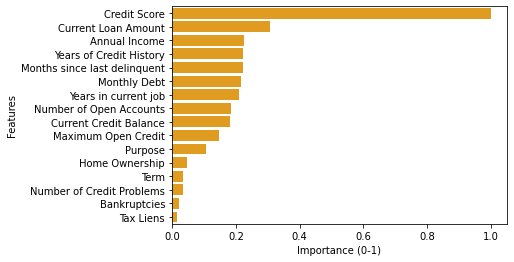

In [ ]:
impDF = drf.varimp(use_pandas=True)
ax = sns.barplot(impDF.scaled_importance,impDF.variable,color='orange')
ax.set(xlabel='Importance (0-1)', ylabel='Features')
plt.show()

Let's Train Model for Decision Tree Classifier using sklearn library

In [ ]:
# define dataset
train, test= train_test_split(pdf,test_size=0.2)
target = train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target= test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

Accuracy:  0.7925875085792725


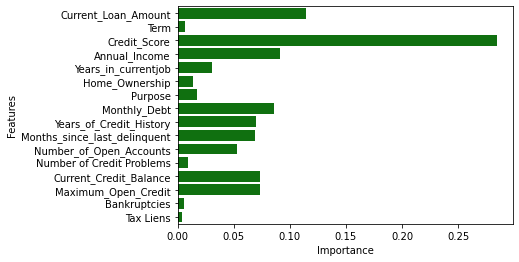

In [ ]:
# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(train, target)

# Accuracy
print('Accuracy: ', model.score(test,test_target))

# get importance
importance = model.feature_importances_

# summarize feature importance
impDF = pd.DataFrame({'importance':importance},index=train.columns)
impDF.importance.sort_values(ascending=False)

# plot feature importance
ax = sns.barplot(impDF.importance,impDF.index,color='green')
ax.set(xlabel='Importance', ylabel='Features')
plt.show()

Let's Train Model for K-Neighbors Classifier from Sklearn library

Accuracy:  0.7552505147563486


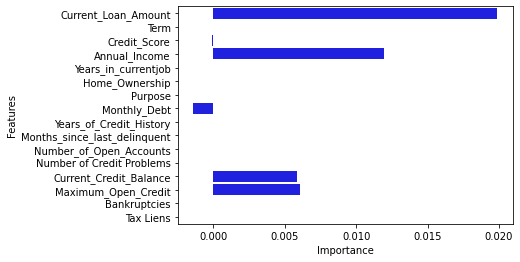

In [ ]:
# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(train, target)

# Accuracy
print('Accuracy: ', model.score(test,test_target))

# perform permutation importance
results = permutation_importance(model, test, test_target, scoring='accuracy')

# get importance
importance = results.importances_mean

# summarize feature importance
impDF = pd.DataFrame({'importance':importance},index=train.columns)
impDF.importance.sort_values(ascending=False)

# plot feature importance
ax = sns.barplot(impDF.importance,impDF.index,color='blue')
ax.set(xlabel='Importance', ylabel='Features')
plt.show()

### Which independent variables have missing data? How much? 

As we can see we don't have any missing data yet we can make some random data as null for our study purpose later in this notebook 

In [ ]:
pdf.isnull().sum()

Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_currentjob             0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number of Credit Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

### Do the training and test sets have the same data?

As we are using 5 K-fold validation set for cross validation, so there is very less chance of test dataset being completely different than training dataset.

Also, from the histplot below we can the distribution of training and test dataset and confirm that both train and test data set is same and not completely different 

In [ ]:
drf.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.846182   0.004517    0.846714    0.851085   
1                       auc    0.814634   0.003302    0.809597    0.815815   
2                       err    0.153818   0.004517    0.153286    0.148915   
3                 err_count  931.800000  21.440617  947.000000  899.000000   
4                  f0point5    0.866105   0.003606    0.867758    0.869336   
5                        f1    0.911134   0.002824    0.911305    0.914127   
6                        f2    0.961105   0.002194    0.959453    0.963785   
7            lift_top_group    1.265046   0.005697    1.262878    1.261651   
8                   logloss    0.365618   0.005654    0.367847    0.359314   
9       max_per_class_error    0.725024   0.007931    0.715397    0.718051   
10                      mcc    0.468986   0.012296    0.464249    0.487191   
11  mean_per_class_accuracy    0.636279   0.003970    0.639542    0.640974   
12     mean_per_class_error    0.363721   0.003970    0.360458    0.359026   
13                      mse    0.116238   0.002378    0.116745    0.113745   
14                   pr_auc    0.941048   0.001542    0.939585    0.941830   
15                precision    0.838480   0.004095    0.840968    0.841837   
16                       r2    0.298127   0.007128    0.291719    0.308028   
17                   recall    0.997582   0.002182    0.994481    1.000000   
18                     rmse    0.340923   0.003487    0.341679    0.337261   
19              specificity    0.274975   0.007931    0.284603    0.281949   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.840034    0.843438    0.849641  
1     0.813106    0.817269    0.817386  
2     0.159966    0.156562    0.150359  
3   951.000000  940.000000  922.000000  
4     0.861048    0.863615    0.868766  
5     0.907319    0.909441    0.913476  
6     0.958845    0.960404    0.963038  
7     1.272747    1.269076    1.258879  
8     0.372985    0.367399    0.360547  
9     0.733909    0.729772    0.727994  
10    0.454855    0.464267    0.474369  
11    0.631333    0.633951    0.635593  
12    0.368667    0.366049    0.364407  
13    0.119270    0.117507    0.113925  
14    0.939197    0.942059    0.942569  
15    0.832737    0.835546    0.841314  
16    0.291638    0.296660    0.302588  
17    0.996575    0.997675    0.999179  
18    0.345355    0.342793    0.337527  
19    0.266091    0.270228    0.272006

Below is the histplot of the distribution of traing and test dataset

In [ ]:
train, test= train_test_split(pdf,test_size=0.2)

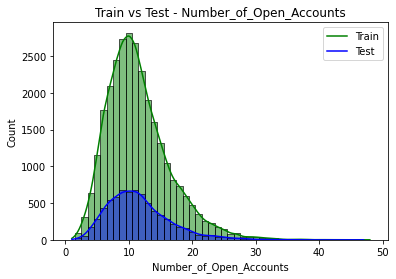

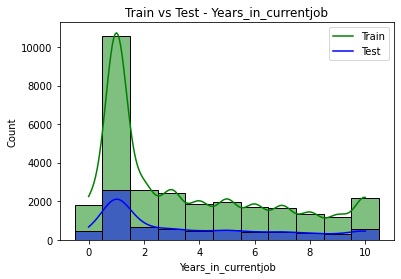

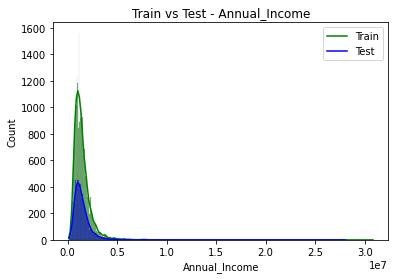

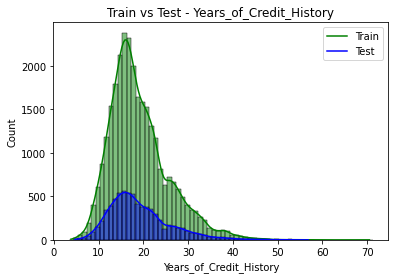

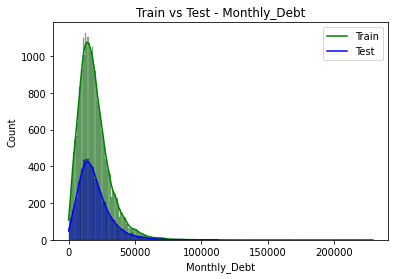

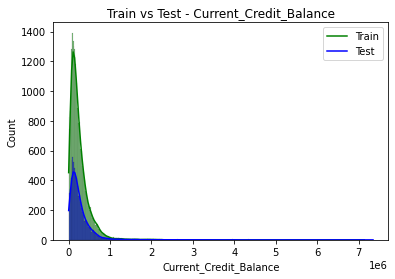

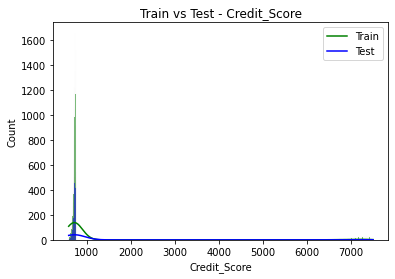

In [ ]:
ax=sns.histplot(train.Number_of_Open_Accounts,kde=True,color='g',discrete=True)
ax=sns.histplot(test.Number_of_Open_Accounts,kde=True,color='b',discrete=True)
ax.set_title('Train vs Test - Number_of_Open_Accounts')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Years_in_currentjob,kde=True,color='g',discrete=True)
ax=sns.histplot(test.Years_in_currentjob,kde=True,color='b',discrete=True)
ax.set_title('Train vs Test - Years_in_currentjob')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Annual_Income,kde=True,color='g')
ax=sns.histplot(test.Annual_Income,kde=True,color='b')
ax.set_title('Train vs Test - Annual_Income')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Years_of_Credit_History,kde=True,color='g',discrete=True)
ax=sns.histplot(test.Years_of_Credit_History,kde=True,color='b',discrete=True)
ax.set_title('Train vs Test - Years_of_Credit_History')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Monthly_Debt,kde=True,color='g')
ax=sns.histplot(test.Monthly_Debt,kde=True,color='b')
ax.set_title('Train vs Test - Monthly_Debt')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Current_Credit_Balance,kde=True,color='g')
ax=sns.histplot(test.Current_Credit_Balance,kde=True,color='b')
ax.set_title('Train vs Test - Current_Credit_Balance')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Credit_Score,kde=True,color='g')
ax=sns.histplot(test.Credit_Score,kde=True,color='b')
ax.set_title('Train vs Test - Credit_Score')
ax.legend(['Train','Test'])
plt.show()

### Are Predictor Variables Independent ?

As we can from below heatmap of corelation metrics, most of the independent variables are not corelated with other independent variables. Hence, Such variables are independent

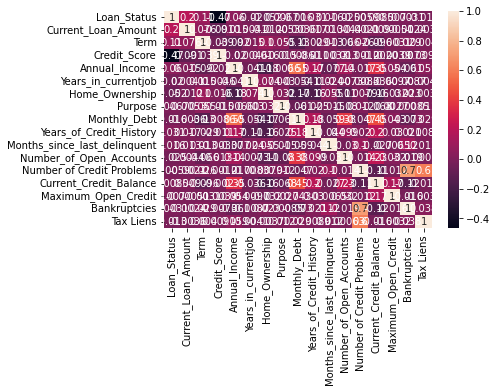

In [ ]:
sns.heatmap(pdf.corr(), annot=True)
plt.show()

### Which predictor variables are the most important?

From the DRF model, below is the ranked table from most significant to least significant predictor variables

Predictor with importance less than 6% is excluded from the model hereonwards Ex. Term 3.3%, Number of Credit Problems 2.8% and Tax Liens 1.24% etc.

importance_percent column indicates the % of importance for individual predictors

In [ ]:
impDF = drf.varimp(use_pandas=True)
impDF['importance_percent']=impDF.scaled_importance*100
highImp=impDF.where(impDF.importance_percent > 5)
highImp=highImp.dropna()
highImp

variable  relative_importance  scaled_importance  \
0                   Credit Score         34310.699219           1.000000   
1            Current Loan Amount         10535.698242           0.307067   
2                  Annual Income          7693.301758           0.224225   
3        Years of Credit History          7625.147949           0.222238   
4   Months since last delinquent          7579.748047           0.220915   
5                   Monthly Debt          7414.243164           0.216091   
6           Years in current job          7213.156738           0.210231   
7        Number of Open Accounts          6384.720215           0.186085   
8         Current Credit Balance          6215.134277           0.181143   
9            Maximum Open Credit          5094.449707           0.148480   
10                       Purpose          3653.600098           0.106486   

    percentage  importance_percent  
0     0.315095          100.000000  
1     0.096755           30.706743  
2     0.070652           22.422457  
3     0.070026           22.223820  
4     0.069609           22.091500  
5     0.068089           21.609129  
6     0.066243           21.023054  
7     0.058635           18.608540  
8     0.057077           18.114275  
9     0.046785           14.847992  
10    0.033553           10.648574

### Do the Ranges of the Predictor Variables Make Sense?
### What are the Distributions of the Predictor Variables?  

As we can see below, from the describe() function which tells us about descriptive statistics such as count, mean, standard deviation (std), min, max, 25,50 and 75th percentile of the data. This helps us alot to understand the distribution of the data and range i.e. difference between max and min values of the data

We can see that range for `Credit Score` is pretty huge and maximum value is way to high than it should be.
As we know max value could be 850 but here its 7510 which means its bad data and there are outliers as 25%, 50% and 75% percentile are below 850 which make sense

count    36423.000000
mean      1055.688905
std       1438.252560
min        585.000000
25%        702.000000
50%        721.000000
75%        738.000000
max       7510.000000
Name: Credit_Score, dtype: float64

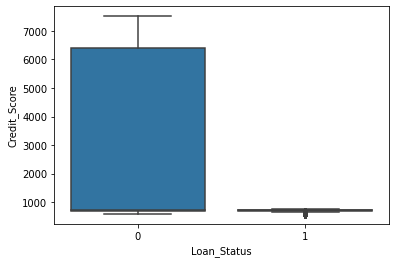

In [ ]:
sns.boxplot(data=pdf,y='Credit_Score',x='Loan_Status')
pdf['Credit_Score'].describe()

Again we can see that range is on higher side as minimum value is zero and it has outliers which can be seen as long tail in the boxplot

count     36423.000000
mean      19269.251544
std       12100.926465
min           0.000000
25%       11125.735000
50%       17117.480000
75%       24766.120000
max      229057.920000
Name: Monthly_Debt, dtype: float64

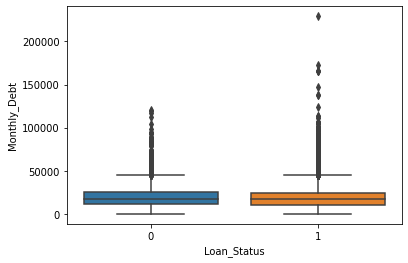

In [ ]:
sns.boxplot(data=pdf,y='Monthly_Debt',x='Loan_Status')
pdf['Monthly_Debt'].describe()

This seems to be ok and distributed with some outliers so that we can see the long tail from boxplot

count    36423.000000
mean        19.065000
std          6.654911
min          3.800000
25%         14.500000
50%         17.700000
75%         22.400000
max         70.500000
Name: Years_of_Credit_History, dtype: float64

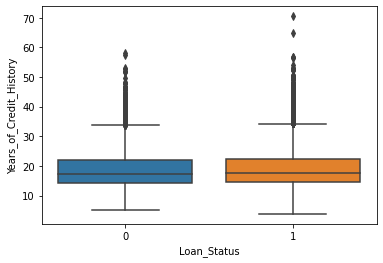

In [ ]:
sns.boxplot(data=pdf,y='Years_of_Credit_History',x='Loan_Status')
pdf['Years_of_Credit_History'].describe()

Again, long tail in the box plot means there are some outliers otherwise till 75% percentile its nicely distributed

count    36423.000000
mean        11.490816
std          4.991626
min          1.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         48.000000
Name: Number_of_Open_Accounts, dtype: float64

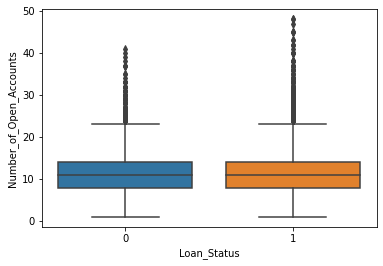

In [ ]:
sns.boxplot(data=pdf,y='Number_of_Open_Accounts',x='Loan_Status')
pdf['Number_of_Open_Accounts'].describe()

## Removing Outliers

As we have seen from the distribution shown before that we have outliers in our dataset.
Let's remove the outliers using Z-score and keep only upto 3 Standard deviation from Mean, anything beyond that would be removed.

We will train our model using RandomForestClassifier before and after removing outliers and will check its effect on Accuracy metrics if any

Now, Lets remove outliers which are beyond 3rd Standard Deviation from Mean using Z-Score

In [ ]:
newpdf = pdf.copy()
newpdf = newpdf[(np.abs(stats.zscore(newpdf)) < 3).all(axis=1)]
train, test = train_test_split(newpdf,test_size=0.3)

target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

Accuracy:  0.8378378378378378


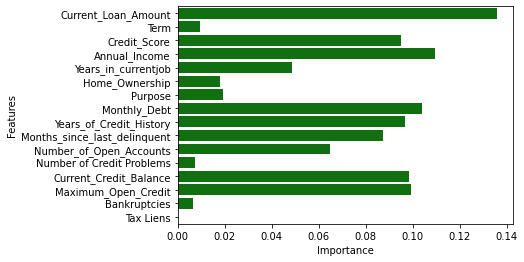

In [ ]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
# get importance
importance = model.feature_importances_
# summarize feature importance
impDF = pd.DataFrame({'importance':importance},index=train.columns)
impDF.importance.sort_values(ascending=False)
# plot feature importance
ax = sns.barplot(impDF.importance,impDF.index,color='green')
ax.set(xlabel='Importance', ylabel='Features')
plt.show()

From below histplot we can see that after removing outliers, data seems to be more normalized without long tails.

However, Even after removing outliers there is **Not** much differnce in our model Accuracy

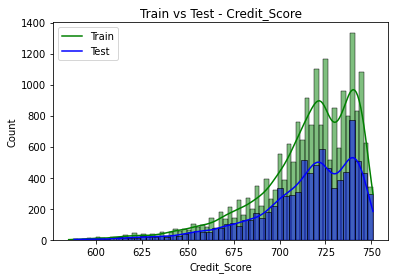

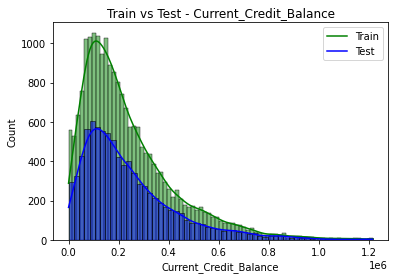

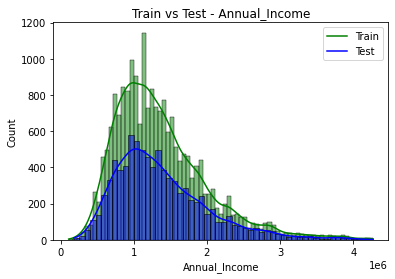

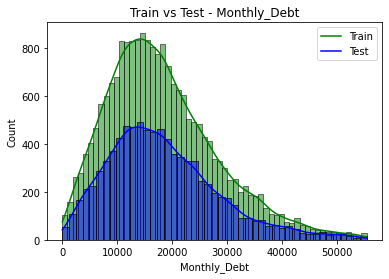

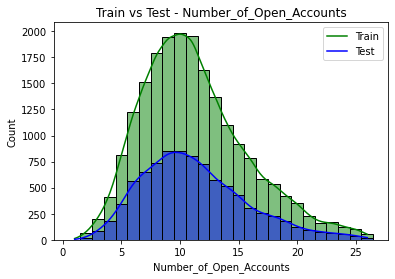

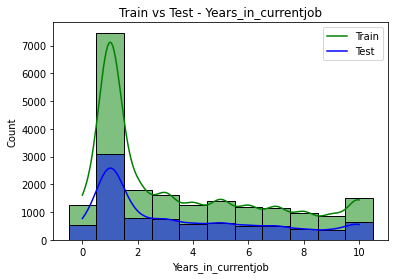

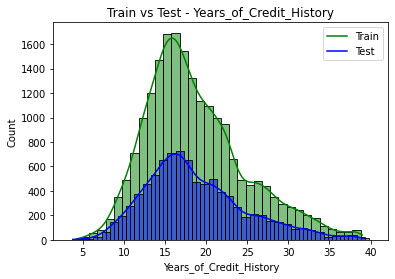

In [ ]:
ax=sns.histplot(train.Credit_Score,kde=True,color='g')
ax=sns.histplot(test.Credit_Score,kde=True,color='b')
ax.set_title('Train vs Test - Credit_Score')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Current_Credit_Balance,kde=True,color='g')
ax=sns.histplot(test.Current_Credit_Balance,kde=True,color='b')
ax.set_title('Train vs Test - Current_Credit_Balance')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Annual_Income,kde=True,color='g')
ax=sns.histplot(test.Annual_Income,kde=True,color='b')
ax.set_title('Train vs Test - Annual_Income')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Monthly_Debt,kde=True,color='g')
ax=sns.histplot(test.Monthly_Debt,kde=True,color='b')
ax.set_title('Train vs Test - Monthly_Debt')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Number_of_Open_Accounts,kde=True,color='g',discrete=True)
ax=sns.histplot(test.Number_of_Open_Accounts,kde=True,color='b',discrete=True)
ax.set_title('Train vs Test - Number_of_Open_Accounts')
ax.legend(['Train','Test'])
plt.show()

ax=sns.histplot(train.Years_in_currentjob,kde=True,color='g',discrete=True)
ax=sns.histplot(test.Years_in_currentjob,kde=True,color='b',discrete=True)
ax.set_title('Train vs Test - Years_in_currentjob')
ax.legend(['Train','Test'])
plt.show()


ax=sns.histplot(train.Years_of_Credit_History,kde=True,color='g',discrete=True)
ax=sns.histplot(test.Years_of_Credit_History,kde=True,color='b',discrete=True)
ax.set_title('Train vs Test - Years_of_Credit_History')
ax.legend(['Train','Test'])
plt.show()



In [ ]:
newpdf = pdf.copy()
train, test = train_test_split(newpdf,test_size=0.3)

target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

## Imputing Data

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
newpdf = pdf.copy()
#Removing Outliers
newpdf = newpdf[(np.abs(stats.zscore(newpdf)) < 3).all(axis=1)]
newdf10 = newpdf.copy()
newdf5 = newpdf.copy()
newdf1 = newpdf.copy()

newpdf.Credit_Score.describe()

count    29229.000000
mean       714.826337
std         27.450708
min        585.000000
25%        702.000000
50%        721.000000
75%        736.000000
max        751.000000
Name: Credit_Score, dtype: float64

In [ ]:
newpdf['Credit_Score_1_percent'] = newpdf['Credit_Score']
newpdf['Credit_Score_5_percent'] = newpdf['Credit_Score']
newpdf['Credit_Score_10_percent'] = newpdf['Credit_Score']
newpdf['sample'] = np.random.randint(585,751,size=newpdf.Credit_Score.count())

newpdf.sample(5)

Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
83919            1             161832.0     1         707.0      1397545.0   
46534            1              51656.0     1         721.0      1254342.0   
46786            0             150568.0     1         742.0      1338645.0   
76371            1           99999999.0     1         734.0      1622752.0   
70073            1             563024.0     1         741.0      1504800.0   

       Years_in_currentjob  Home_Ownership  Purpose  Monthly_Debt  \
83919                    1               1        5       8257.21   
46534                    1               1        3       8884.97   
46786                    3               1        3      29338.66   
76371                    1               1        3      25964.07   
70073                    8               1        3      16051.20   

       Years_of_Credit_History  ...  Number_of_Open_Accounts  \
83919                     26.0  ...                     13.0   
46534                     15.3  ...                     10.0   
46786                     19.2  ...                     15.0   
76371                     25.7  ...                      9.0   
70073                     19.7  ...                     12.0   

       Number of Credit Problems  Current_Credit_Balance  Maximum_Open_Credit  \
83919                        0.0                146053.0             413446.0   
46534                        0.0                 31065.0             294844.0   
46786                        0.0                315362.0             795564.0   
76371                        0.0                355927.0             672320.0   
70073                        0.0                255949.0             409332.0   

       Bankruptcies  Tax Liens  Credit_Score_1_percent  \
83919           0.0        0.0                   707.0   
46534           0.0        0.0                   721.0   
46786           0.0        0.0                   742.0   
76371           0.0        0.0                   734.0   
70073           0.0        0.0                   741.0   

       Credit_Score_5_percent  Credit_Score_10_percent  sample  
83919                   707.0                    707.0     673  
46534                   721.0                    721.0     632  
46786                   742.0                    742.0     725  
76371                   734.0                    734.0     691  
70073                   741.0                    741.0     605  

[5 rows x 21 columns]

In [ ]:
def make_nan(df, percent, feature):
    df.loc[df.sample(frac = percent).index, feature] = np.nan

def get_missing_percent(df):
    missing_percent = df.isnull().sum() * 100 / len(df)
    missing_value = pd.DataFrame({'percent_missing': missing_percent,'Count':df.isnull().sum()})
    return missing_value

make_nan(newpdf, 0.01, 'Credit_Score_1_percent')
make_nan(newpdf, 0.05, 'Credit_Score_5_percent')
make_nan(newpdf, 0.1, 'Credit_Score_10_percent')

In [ ]:
print('Null Rows Stats: \n', get_missing_percent(newpdf))
#storing index of null values
index_1_percent = list(np.where(newpdf['Credit_Score_1_percent'].isna())[0])
index_5_percent = list(np.where(newpdf['Credit_Score_5_percent'].isna())[0])
index_10_percent = list(np.where(newpdf['Credit_Score_10_percent'].isna())[0])

Null Rows Stats: 
                               percent_missing  Count
Loan_Status                          0.000000      0
Current_Loan_Amount                  0.000000      0
Term                                 0.000000      0
Credit_Score                         0.000000      0
Annual_Income                        0.000000      0
Years_in_currentjob                  0.000000      0
Home_Ownership                       0.000000      0
Purpose                              0.000000      0
Monthly_Debt                         0.000000      0
Years_of_Credit_History              0.000000      0
Months_since_last_delinquent         0.000000      0
Number_of_Open_Accounts              0.000000      0
Number of Credit Problems            0.000000      0
Current_Credit_Balance               0.000000      0
Maximum_Open_Credit                  0.000000      0
Bankruptcies                         0.000000      0
Tax Liens                            0.000000      0
Credit_Score_1_percent     

## KNN Imputation

In [ ]:
df_impute_10 = newpdf[['sample','Credit_Score_10_percent']]
df_impute_5 = newpdf[['sample','Credit_Score_5_percent']]
df_impute_1 = newpdf[['sample','Credit_Score_1_percent']]

#KNN Imputation
imputer = KNNImputer(n_neighbors=5)

imputed_10_df = pd.DataFrame(imputer.fit_transform(df_impute_10), columns = df_impute_10.columns)
imputed_5_df = pd.DataFrame(imputer.fit_transform(df_impute_5), columns = df_impute_5.columns)
imputed_1_df = pd.DataFrame(imputer.fit_transform(df_impute_1), columns = df_impute_1.columns)

print('Null Rows Stats 10%: \n', get_missing_percent(imputed_10_df))
print('\nNull Rows Stats 5%: \n', get_missing_percent(imputed_5_df))
print('\nNull Rows Stats 1%: \n', get_missing_percent(imputed_1_df))

Null Rows Stats 10%: 
                          percent_missing  Count
sample                               0.0      0
Credit_Score_10_percent              0.0      0

Null Rows Stats 5%: 
                         percent_missing  Count
sample                              0.0      0
Credit_Score_5_percent              0.0      0

Null Rows Stats 1%: 
                         percent_missing  Count
sample                              0.0      0
Credit_Score_1_percent              0.0      0


In [ ]:
def get_imputedStats(imputed_10_df,imputed_5_df,imputed_1_df):
    imputed_10_df['OG_Credit_Score'] = newpdf['Credit_Score'].values
    imputed_5_df['OG_Credit_Score'] = newpdf['Credit_Score'].values
    imputed_1_df['OG_Credit_Score'] = newpdf['Credit_Score'].values

    imputed_10_df['Diff'] = imputed_10_df.OG_Credit_Score-imputed_10_df.Credit_Score_10_percent
    imputed_5_df['Diff'] = imputed_5_df.OG_Credit_Score-imputed_5_df.Credit_Score_5_percent
    imputed_1_df['Diff'] = imputed_1_df.OG_Credit_Score-imputed_1_df.Credit_Score_1_percent

    imputedStats_10 = pd.DataFrame({'Original_Credit_Score':imputed_10_df.OG_Credit_Score,
                                    'Imputed_Credit_Score':imputed_10_df.Credit_Score_10_percent,
                                    'Difference':imputed_10_df.Diff}
                                  )
    imputedStats_5 = pd.DataFrame({'Original_Credit_Score':imputed_5_df.OG_Credit_Score,
                                    'Imputed_Credit_Score':imputed_5_df.Credit_Score_5_percent,
                                    'Difference':imputed_5_df.Diff}
                                  )
    imputedStats_1 = pd.DataFrame({'Original_Credit_Score':imputed_1_df.OG_Credit_Score,
                                    'Imputed_Credit_Score':imputed_1_df.Credit_Score_1_percent,
                                    'Difference':imputed_1_df.Diff}
                                  )
    return imputedStats_10, imputedStats_5, imputedStats_1


def print_percent_stats(method,stats,percent,index):
    print(method +' Imputed Stats For'+str(percent)+'%')
    print('Original_Credit_Score | Imputed_Credit_Score | Difference')
    for i in index:
        print(str(stats.Original_Credit_Score[i]),'----------------------',
              str(stats.Imputed_Credit_Score[i]),'--------------',
              str(stats.Difference[i]))

In [ ]:
imputedStats_10, imputedStats_5, imputedStats_1 = get_imputedStats(imputed_10_df,imputed_5_df,imputed_1_df)

In [ ]:
print_percent_stats('KNN',imputedStats_10,10,index_10_percent)

KNN Imputed Stats For10%
Original_Credit_Score | Imputed_Credit_Score | Difference
678.0 ---------------------- 697.4 -------------- -19.399999999999977
736.0 ---------------------- 731.4 -------------- 4.600000000000023
747.0 ---------------------- 697.4 -------------- 49.60000000000002
720.0 ---------------------- 698.0 -------------- 22.0
715.0 ---------------------- 685.2 -------------- 29.799999999999955
726.0 ---------------------- 715.4 -------------- 10.600000000000023
750.0 ---------------------- 721.8 -------------- 28.200000000000045
742.0 ---------------------- 706.0 -------------- 36.0
699.0 ---------------------- 715.2 -------------- -16.200000000000045
738.0 ---------------------- 717.6 -------------- 20.399999999999977
731.0 ---------------------- 720.6 -------------- 10.399999999999977
697.0 ---------------------- 699.4 -------------- -2.3999999999999773
722.0 ---------------------- 707.2 -------------- 14.799999999999955
710.0 ---------------------- 725.8 ------------

### Training Model

Let's train model to verify the effect if newly imputed data on accuracy metric

In [ ]:
newdf10['Credit_Score'] = imputed_10_df.Credit_Score_10_percent.values
newdf5['Credit_Score'] = imputed_5_df.Credit_Score_5_percent.values
newdf1['Credit_Score'] = imputed_1_df.Credit_Score_1_percent.values

In [ ]:
train, test = train_test_split(newdf10,test_size=0.3)
target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
pred = model.predict(test)
mse=metrics.mean_squared_error(test_target,pred)
print('F1 Score: ',metrics.f1_score(test_target,pred))
print('RMSE: ', math.sqrt(mse))

Accuracy:  0.841829170943095
F1 Score:  0.9138883715154902
RMSE:  0.39770696380237675


In [ ]:
train, test = train_test_split(newdf5,test_size=0.3)
target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
pred = model.predict(test)
mse=metrics.mean_squared_error(test_target,pred)
print('F1 Score: ',metrics.f1_score(test_target,pred))
print('RMSE: ', math.sqrt(mse))

Accuracy:  0.8404607138784354
F1 Score:  0.9129921014988495
RMSE:  0.3994236924890217


In [ ]:
train, test = train_test_split(newdf1,test_size=0.3)
target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
pred = model.predict(test)
mse=metrics.mean_squared_error(test_target,pred)
print('F1 Score: ',metrics.f1_score(test_target,pred))
print('RMSE: ', math.sqrt(mse))

Accuracy:  0.8423993613867031
F1 Score:  0.9141614906832298
RMSE:  0.39698946914659694


## Mean Imputation

In [ ]:
df_impute_10 = newpdf[['sample','Credit_Score_10_percent']]
df_impute_5 = newpdf[['sample','Credit_Score_5_percent']]
df_impute_1 = newpdf[['sample','Credit_Score_1_percent']]
imputer = SimpleImputer(strategy='mean')

imputed_10_df = pd.DataFrame(imputer.fit_transform(df_impute_10), columns = df_impute_10.columns)
imputed_5_df = pd.DataFrame(imputer.fit_transform(df_impute_5), columns = df_impute_5.columns)
imputed_1_df = pd.DataFrame(imputer.fit_transform(df_impute_1), columns = df_impute_1.columns)

print('Null Rows Stats 10%: \n', get_missing_percent(imputed_10_df))
print('\nNull Rows Stats 5%: \n', get_missing_percent(imputed_5_df))
print('\nNull Rows Stats 1%: \n', get_missing_percent(imputed_1_df))

Null Rows Stats 10%: 
                          percent_missing  Count
sample                               0.0      0
Credit_Score_10_percent              0.0      0

Null Rows Stats 5%: 
                         percent_missing  Count
sample                              0.0      0
Credit_Score_5_percent              0.0      0

Null Rows Stats 1%: 
                         percent_missing  Count
sample                              0.0      0
Credit_Score_1_percent              0.0      0


In [ ]:
imputedStats_10, imputedStats_5, imputedStats_1 = get_imputedStats(imputed_10_df,imputed_5_df,imputed_1_df)

In [ ]:
print_percent_stats('Mean',imputedStats_10,10,index_10_percent)

Mean Imputed Stats For10%
Original_Credit_Score | Imputed_Credit_Score | Difference
678.0 ---------------------- 714.6990420436402 -------------- -36.69904204364025
736.0 ---------------------- 714.6990420436402 -------------- 21.300957956359753
747.0 ---------------------- 714.6990420436402 -------------- 32.30095795635975
720.0 ---------------------- 714.6990420436402 -------------- 5.300957956359753
715.0 ---------------------- 714.6990420436402 -------------- 0.30095795635975264
726.0 ---------------------- 714.6990420436402 -------------- 11.300957956359753
750.0 ---------------------- 714.6990420436402 -------------- 35.30095795635975
742.0 ---------------------- 714.6990420436402 -------------- 27.300957956359753
699.0 ---------------------- 714.6990420436402 -------------- -15.699042043640247
738.0 ---------------------- 714.6990420436402 -------------- 23.300957956359753
731.0 ---------------------- 714.6990420436402 -------------- 16.300957956359753
697.0 --------------------

### Training Model

Let's train model to verify the effect if newly imputed data on accuracy metric

In [ ]:
newdf10['Credit_Score'] = imputed_10_df.Credit_Score_10_percent.values
newdf5['Credit_Score'] = imputed_5_df.Credit_Score_5_percent.values
newdf1['Credit_Score'] = imputed_1_df.Credit_Score_1_percent.values

In [ ]:
train, test = train_test_split(newdf10,test_size=0.3)
target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
pred = model.predict(test)
mse=metrics.mean_squared_error(test_target,pred)
print('F1 Score: ',metrics.f1_score(test_target,pred))
print('RMSE: ', math.sqrt(mse))

Accuracy:  0.8476451134678983
F1 Score:  0.9172550476898303
RMSE:  0.39032664081779217


In [ ]:
train, test = train_test_split(newdf5,test_size=0.3)
target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
pred = model.predict(test)
mse=metrics.mean_squared_error(test_target,pred)
print('F1 Score: ',metrics.f1_score(test_target,pred))
print('RMSE: ', math.sqrt(mse))

Accuracy:  0.8381799521040028
F1 Score:  0.9117811625738266
RMSE:  0.4022686265370409


In [ ]:
train, test = train_test_split(newdf1,test_size=0.3)
target=train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target=test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train, target)
print('Accuracy: ', model.score(test,test_target))
pred = model.predict(test)
mse=metrics.mean_squared_error(test_target,pred)
print('F1 Score: ',metrics.f1_score(test_target,pred))
print('RMSE: ', math.sqrt(mse))

Accuracy:  0.8400045615235489
F1 Score:  0.9127758781473422
RMSE:  0.3999942980549237


In [ ]:
# Reference 1
newpdf = pdf.copy()
# Removing outliers whose z score is beyond 3 standard deviation
newpdf = newpdf[(np.abs(stats.zscore(newpdf)) < 3).all(axis=1)]
train, test = train_test_split(newpdf,test_size=0.2)
target = train['Loan_Status']
train.drop(columns=['Loan_Status'],inplace=True)
test_target= test['Loan_Status']
test.drop(columns=['Loan_Status'],inplace=True)

catagorical_features = ['Term','Home_Ownership','Years_in_currentjob','Purpose']
numerical_features = [c for c in train.columns if c not in catagorical_features]
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = DecisionTreeClassifier()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])

p = pipeline.fit(train, target)

Lets create a nan frame to get the base value for the model

In [ ]:
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[10])
nan_frame

Term Home_Ownership Years_in_currentjob Purpose Current_Loan_Amount  \
10  NaN            NaN                 NaN     NaN                 NaN   

   Credit_Score Annual_Income Monthly_Debt Years_of_Credit_History  \
10          NaN           NaN          NaN                     NaN   

   Months_since_last_delinquent Number_of_Open_Accounts  \
10                          NaN                     NaN   

   Number of Credit Problems Current_Credit_Balance Maximum_Open_Credit  \
10                       NaN                    NaN                 NaN   

   Bankruptcies Tax Liens  
10          NaN       NaN

#### Base value is 0 i.e. Fully Paid

In [ ]:
base_value = round(pipeline.predict(nan_frame)[0])
print("Expected value of the base output: ",base_value)

Expected value of the base output:  1


In [ ]:
test.iloc[11:12]

Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
7290              64724.0     1         739.0       465880.0   

      Years_in_currentjob  Home_Ownership  Purpose  Monthly_Debt  \
7290                    3               3        3       1844.14   

      Years_of_Credit_History  Months_since_last_delinquent  \
7290                     34.1                           2.0   

      Number_of_Open_Accounts  Number of Credit Problems  \
7290                      3.0                        0.0   

      Current_Credit_Balance  Maximum_Open_Credit  Bankruptcies  Tax Liens  
7290                 73758.0             433510.0           0.0        0.0

As we can see for the sample test data frame the prediction value is 1 i.e Fully Paid whose actual value was also 1 i.e. Fully Paid

But, These prediction would not help much unless we are not able to interprete it and know which exact features were the contrubuting factor to predict that for given sample test frame the loan will be Fully Paid.


In [ ]:
sample_prediction = round(pipeline.predict(test.iloc[11: 12])[0])
print("Current Prediction {}, Actual value: {}".format(sample_prediction,test_target.iloc[10]))

Current Prediction 1, Actual value: 1


### Partial Dependecy Plot

The above problem can be solved using partial dependency plot which uses `Shap Values` to order the feature importance and individual contribution of the features in predicting the model 

So, Let's make a partial dependency plot (PDP) using shap lib

In [ ]:
# compute the SHAP values for the linear model
def model_adult_proba(x):
    return model.predict_proba(x)[:,1]

train_explainer = shap.maskers.Independent(train, max_samples=100)
explainer = shap.Explainer(model_adult_proba, train_explainer)
LG_shap_values = explainer(train[:1000])

Permutation explainer: 1001it [17:19,  1.05s/it]


### Interpretation of PDP
As we can see in the below PDP, The visualization gives us the representation for the gray color distribution of the train data sample for Credit Score feature

The `X-axis` is the feature, and `Y-axis` is the model output as we vary credit score

The dashed line crosshair represents the actual value of the feature and black dot represents the predicted model output value for the sample data

The `Red` color line represents the difference in the predicted model output and actual value which is the contributing factor for given sample, where the magnitude of the red line is known as **Shapley value**

In [ ]:
def partial_dependence_plot(feature, shap_val,idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_val[idx:idx+1,:])

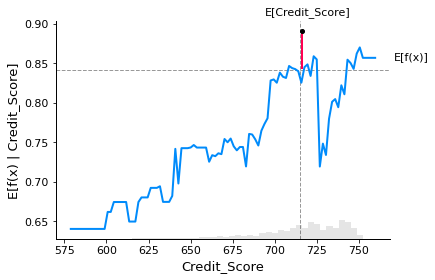

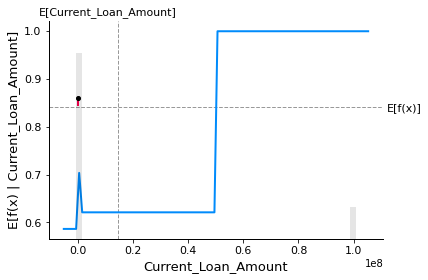

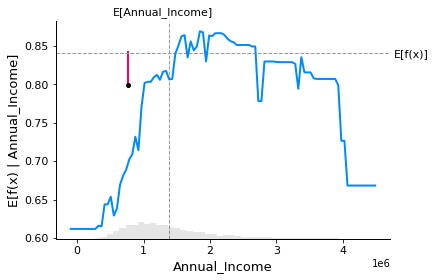

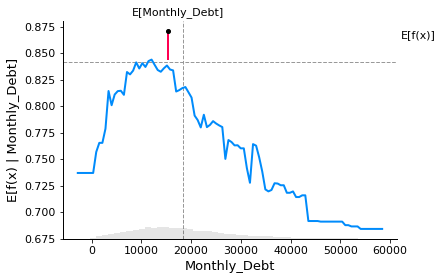

In [ ]:
partial_dependence_plot('Credit_Score',LG_shap_values,11)
partial_dependence_plot('Current_Loan_Amount',LG_shap_values,11)
partial_dependence_plot('Annual_Income',LG_shap_values,11)
partial_dependence_plot('Monthly_Debt',LG_shap_values,11)

### Why Shap?

As we saw PDP helps us to understand the contribution of each individual feature then why we need Shap

Even though PDP solve the purpose we need to make several plots to understand the contrubution, here Shap helps us to understand contribution of all features in single plot along with the information of Positive/ Negative impact of the feature on the model outcome for given sample data record

In [ ]:
# Init shap
shap.initjs()

### Interpretation of Shap

From the below Shap visualization we can clearly understand which exact features are contributing in the prediction as well as if they have positive or negative impact on the prediction for the given particular sample data

We can see that features in the **`Red`** color represents positive impact on the prediction to increase the odds of the prediction to become model output as `1` i.e. **Fully Paid**

Whereas, Features in **`Blue`** color represents the negative impact on the model outcome by decreasing the odds of the prediction

As we can see below, for linear model the model outcome for given sample in `0.89` which is the log likliehood of the Loan Status happens to be 1 i.e. `Fully Paid` where base value is for the entire model 

For this sample data, `Annual Income`, `Current Credit Balance` having huge positive contribution whereas `Current Loan Amount` is Negatively impacting the model outcome

In [ ]:
shap.initjs()
shap.plots.force(LG_shap_values[11])

For this sample data, Only having lower `Monthly Debt` is having positive contribution whereas everything else is not in favor. Hence, the model outcome is very less and even less than the base value of the model

In [ ]:
shap.initjs()
shap.plots.force(LG_shap_values[26])


From below beeswarm plot we can see the summary of the range of the contribution factors of the features in the heatmap

We can interprete that having less `Annual Income` is **Negatively** impacting the Loan_Status for majority of the cases and having high Annual Income is in favor, which make sense

On other hand, having higher `Current Loan Amount` and `Monthly Debt` is negatively impacting the model outcome and having lower Loan Amount and `Monthly Debt` is in favor

In contrast, having lower `Credit Score` and `Current Credit Balance` is negatively impacting the model outcome and its better to have high credit score and credit balance

Most of remaining features are having less contribution and neither affect positively or negatively

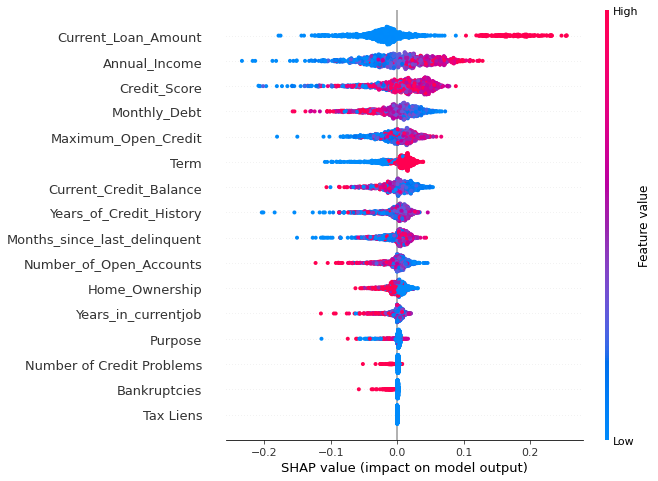

In [ ]:
shap.initjs()
shap.plots.beeswarm(LG_shap_values,max_display=17)

## Decision Tree
Lets train DecisionTree Classifier model and interprete its inbuilt feature importance

Accuracy:  0.7743756414642491


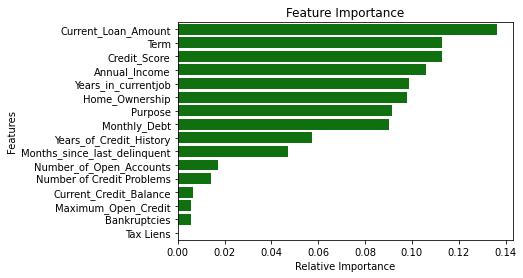

In [ ]:
# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(train, target)

# Accuracy
print('Accuracy: ', model.score(test,test_target))

# get importance
importance = model.feature_importances_

# summarize feature importance
impDF = pd.DataFrame({'importance':importance},index=train.columns)

# plot feature importance
ax = sns.barplot(impDF.importance.sort_values(ascending=False),impDF.index,color='green')
ax.set(xlabel='Relative Importance', ylabel='Features')
ax.set_title('Feature Importance')
plt.show()

This is relative importance of the contrubuting features and it doesn't inform about the if the feature contributed positively or negatively

In [ ]:
explainer = shap.Explainer(pipeline.predict, train)
DT_shap_values = explainer(test)

Permutation explainer: 5847it [38:59,  2.49it/s]


As we have selected the 10th sample where `Credit Score` was `671` from sample test dataset. This is represented by by black dot and the magnitude of the Red line represents the Shapley value

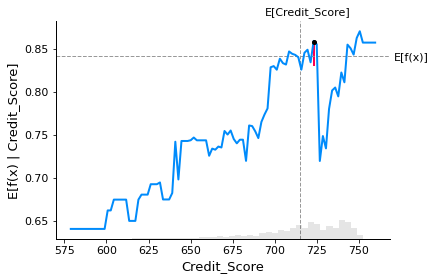

In [ ]:
partial_dependence_plot('Credit_Score',DT_shap_values,10)

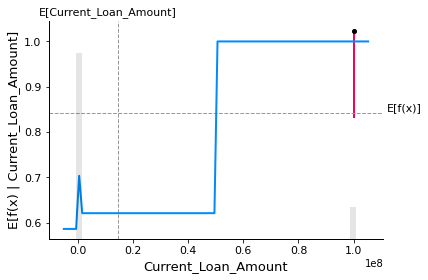

In [ ]:
partial_dependence_plot('Current_Loan_Amount',DT_shap_values,10)

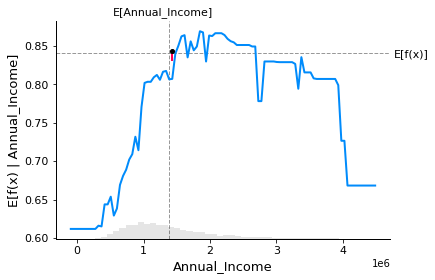

In [ ]:
partial_dependence_plot('Annual_Income',DT_shap_values,10)

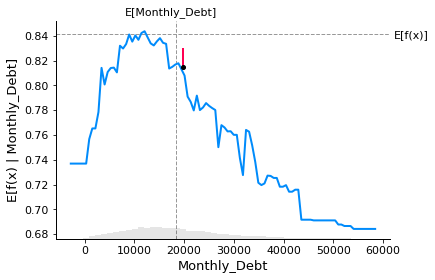

In [ ]:
partial_dependence_plot('Monthly_Debt',DT_shap_values,10)

###  Shap

From the below Shap visualization we can clearly understand which exact features are contributing in the prediction as well as if they have positive or negative impact on the prediction for the given particular sample data

We can see that features in the **`Red`** color represents positive impact on the prediction to increase the odds of the prediction to become model output as `1` i.e. **Fully Paid**

Whereas, Features in **`Blue`** color represents the negative impact on the model outcome by decreasing the odds of the prediction


For sample no. 10 `Current Credit Balance` has the huge postive impact along with `Monthly Debt`,`Credit Score`,`Years of Credit History` are the feature in Red color contributing whereas features in Blue color `Annual Income`, `Term`, `Home Ownership` are negatively contributing for model outcome for given data sample

The `f(x)` is the model outcome for given sample data which is the odds of the loan status being 1 i.e. 'Fully Paid' and `base value` is the base expected value for entire model

In [ ]:
shap.initjs()
shap.plots.force(DT_shap_values[10])

For the below Shap viz. we can see that for this given sample data the Loan Status is `0` i.e.**'Charged Off'**


For another sample no.117 `Credit Score`, `Years of Credit History` are the only feature in Red color contributing positively whereas remaining features in Blue color `Current Loan Amount` and `Annual Income` has huge negative impact along with `Current Credit Balance`,`Monthly Debt`, `Annual Income`, `Term`, `Home Ownership` are negatively contributing for model outcome for given data sample

The `f(x)` is the model outcome for given sample data which is the odds of the loan status being 0 i.e. 'Charged Off' and `base value` is the base expected value for entire model

In [ ]:
shap.initjs()
shap.plots.force(DT_shap_values[117])

### Waterfall Plot for Shap

This is similar to the `condensed` plot shown above but this is vertically oriented

For sample 10, We can see that `Current Credit Balance` and `Monthly Debt` has the huge postive impact along with `Credit Score`,`Years of Credit History` are the major positively contributing factor and `Annual Income`, `Term`, `Home Ownership` are negatively impacting the model outcome

Where `Number of Credit Problems`, `Bankruptcies`, `Tax Liens` have **no** impact on the model outcome

Since, Most of the features are in favor of postive model outcome the Loan Status is `1` i.e. **'Fully Paid'**

The `f(x)` is the model outcome for given sample data which is the odds of the loan status being 1 i.e. 'Fully Paid' and `E[f(X)]` is the base expected value for entire model

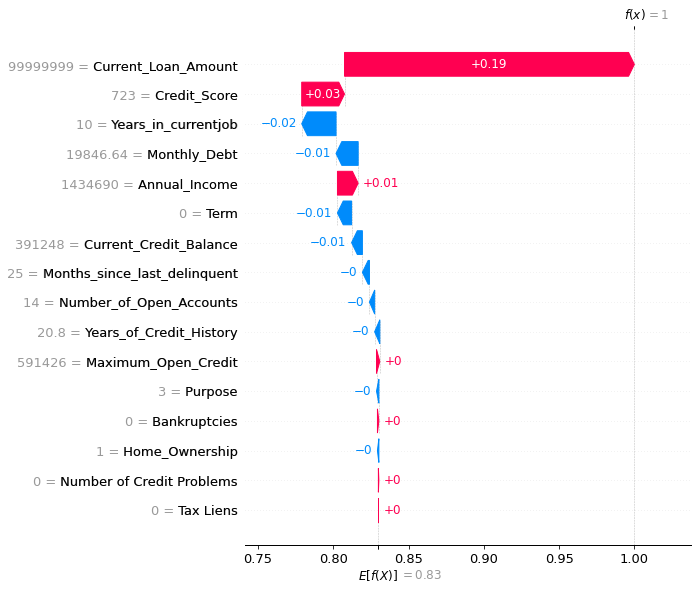

In [ ]:
shap.initjs()
shap.plots.waterfall(DT_shap_values[10],max_display=17)

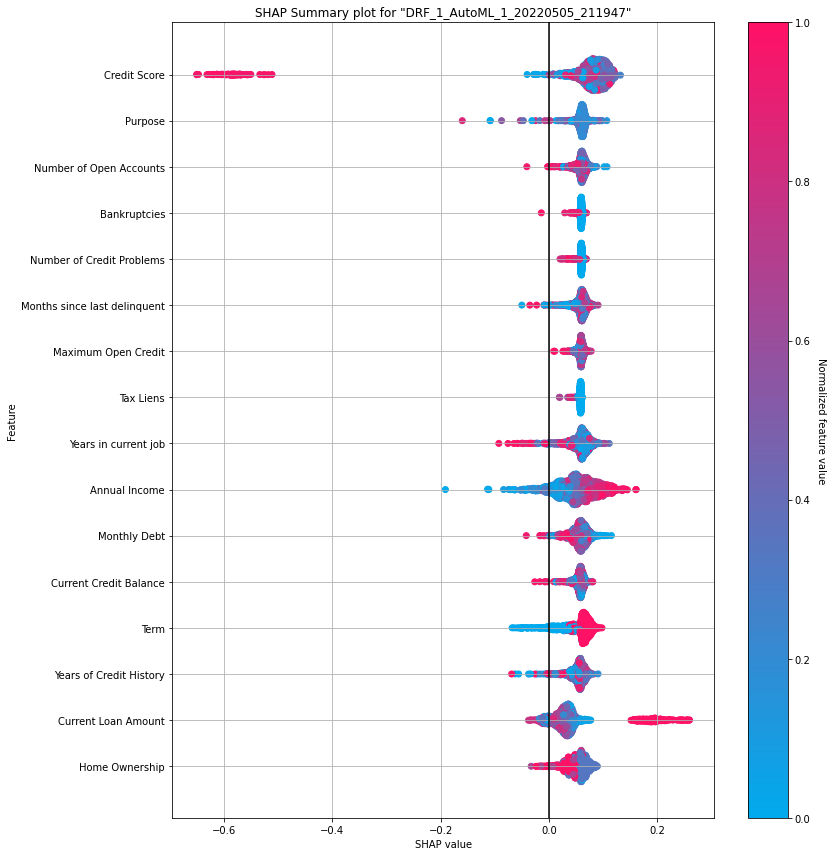

In [ ]:
gbm=aml.get_best_model()
gbm.shap_summary_plot(df_train)

## Conclusion

After looking at the accuracy and performance metrics, we can conclude that a Machine Learning model can be used to automate the 'Bank Loan Application'. By doing so we can accurately predict and decide based on a customer and his/her finance data if he/she could pay off entire loan or it would turn a bad loan debt.

The DRF 'Distributed Random Forest' has shown the better accuracy, precision and recall value among various models like 'XRT', 'GBM' and 'XGBoost' with AUC 82.50%, MSE 0.11 and RMSE 0.34 for DRF.

Also, after performing regularization the accuracy has increased and MSE, RMSE has decreased compared to base model, which indicated that model has performed better

The Accuracy, Precision and Recall value of the 'DRF' model can be improved further even though Decison Tree based model often settle with accurcy at certain point and doesn't improve further.

After using 3 different imputation techiniques we can see from the accuracy metrics as well as descriptive statistics (describe()) - there is not significant difference among KNN, Mean and MICE imputation techique on `Credit Score`.

All of them predicted null values equally with similar accuracy, error residual and no big change in mean `Credit Score` and very less change in Standard Deviation of the data even after imputation

After interpretation of model using various techniques, we can clearly understand following points:

1. Having less `Annual Income` is **Negatively** impacting the Loan_Status for majority of the cases and having high Annual Income is in favor, which make sense

2. Having higher `Current Loan Amount` and `Monthly Debt` is negatively impacting the model outcome and having lower Loan Amount and `Monthly Debt` is in favor

3. Having lower `Credit Score` and `Current Credit Balance` is negatively impacting the model outcome and its better to have high credit score and credit balance

4. Most of remaining features are having less contribution and neither affect positively or negatively

Model interpretation may slightly change as we change the model as we seen in PDP, SHAP And LIME techniques

## References


1. https://github.com/nikbearbrown/AI_Research_Group/blob/main/Kaggle_Datasets/AutoML/VAI_Churn_H2O_automl.ipynb
2. https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09
3. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html
4. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
5. https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions

## License


MIT License

Copyright (c) 2022 Sanket Sanap

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
